In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [121]:
job="content_writer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [122]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,i2e Consulting,Content Writer/ Sr.Content Writer,Remote,0.0,"Project portfolio management, Content creation...",4.2,Content Writer
1,Guires Solutions Private Limited,Freelance Academic Content Writer (PhD Level -...,Remote,0.0,"Microsoft Word, Google Docs, Writing skills, M...",NaN,Content Writer
2,Accunai India,Technical Writer - AI/ML & Data,India,390000.0,"Software deployment, Writing skills, Machine l...",NaN,Content Writer
3,Sprinto,Technical Writer - Remote,Remote,0.0,"Information security, Communication skills",4.2,Content Writer
4,Pearson,Editorial Administrator,Noida,585500.0,"English, Research, Communication skills",3.7,Content Writer


In [123]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    40
company_rating           236
standardized_job_role      0
dtype: int64

In [124]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [125]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,i2e Consulting,Content Writer/ Sr.Content Writer,Remote,0.0,"Project portfolio management, Content creation...",4.2,Content Writer
1,Guires Solutions Private Limited,Freelance Academic Content Writer (PhD Level -...,Remote,0.0,"Microsoft Word, Google Docs, Writing skills, M...",NaN,Content Writer
3,Sprinto,Technical Writer - Remote,Remote,0.0,"Information security, Communication skills",4.2,Content Writer
6,Cybrosys Technologies,Content Writer,Kerala,0.0,"Microsoft Word, Google Docs, English",4.3,Content Writer
7,Aristocrat,Technical Writer,Gurgaon,0.0,"XML, Journalism, English, Research, Microsoft ...",3.7,Content Writer
...,...,...,...,...,...,...,...
785,Crypto Mize,English Content Writer,Delhi,0.0,"Keyword research, English, Microsoft Office, I...",4.8,Content Writer
787,Crypto Mize,Japanese Writer,Delhi,0.0,"English, Japanese, Information security, Conte...",4.8,Content Writer
789,valueaddsofttech,Content Writer,Pune,0.0,"WordPress, Writing skills, Content management ...",NaN,Content Writer
791,ATHMIN,Content Writer,Noida,0.0,"English, SaaS",3.8,Content Writer


### Filling the null values by replacing with average salary of company rating

In [127]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [128]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [129]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,i2e Consulting,Content Writer/ Sr.Content Writer,Remote,14.141667,"Project portfolio management, Content creation...",4.2,Content Writer
1,Guires Solutions Private Limited,Freelance Academic Content Writer (PhD Level -...,Remote,3.794197,"Microsoft Word, Google Docs, Writing skills, M...",0.0,Content Writer
2,Accunai India,Technical Writer - AI/ML & Data,India,3.900000,"Software deployment, Writing skills, Machine l...",0.0,Content Writer
3,Sprinto,Technical Writer - Remote,Remote,14.141667,"Information security, Communication skills",4.2,Content Writer
4,Pearson,Editorial Administrator,Noida,5.855000,"English, Research, Communication skills",3.7,Content Writer
...,...,...,...,...,...,...,...
788,GigSoft Pro,Content Writer,Mohali,1.980000,"Creative writing, Writing skills, English, Com...",0.0,Content Writer
789,valueaddsofttech,Content Writer,Pune,3.794197,"WordPress, Writing skills, Content management ...",0.0,Content Writer
790,DotcomPal,Content Writer,Kota,42.000000,"Blogging, English, White papers, Technical wri...",3.5,Content Writer
791,ATHMIN,Content Writer,Noida,23.385833,"English, SaaS",3.8,Content Writer


In [130]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [131]:
df.describe()

,salary_lpa,company_rating
count,793.000000,793.000000
mean,12.564856,2.756620
std,13.003968,1.874701
min,0.060000,0.000000
25%,3.900000,0.000000
50%,6.000000,3.700000
75%,18.000000,4.100000
max,48.000000,5.000000


In [132]:
df.nunique()

company_name             710
job_role                 295
job_location              70
salary_lpa               123
skills                   669
company_rating            34
standardized_job_role      1
dtype: int64

In [133]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [135]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [136]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                      Skill  Count
12                  english    405
7            writing skills    196
13                 research    185
10        technical writing    164
4      communication skills    163
..                      ...    ...
173              statistics      1
169                    math      1
165     document management      1
163  training & development      1
284                 punjabi      1

[285 rows x 2 columns]


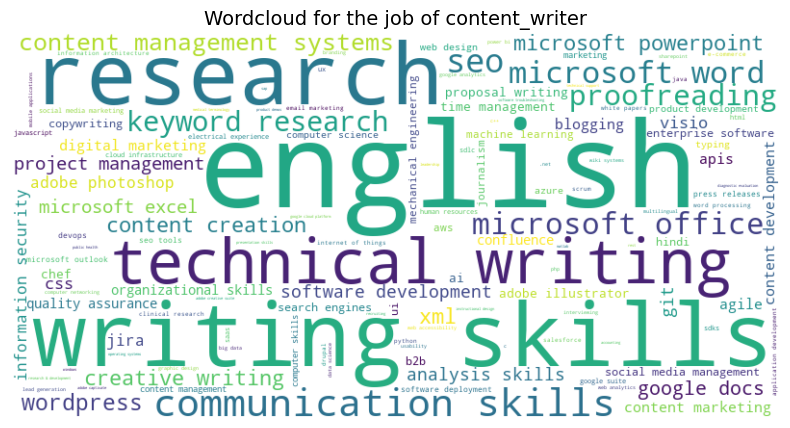

In [137]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


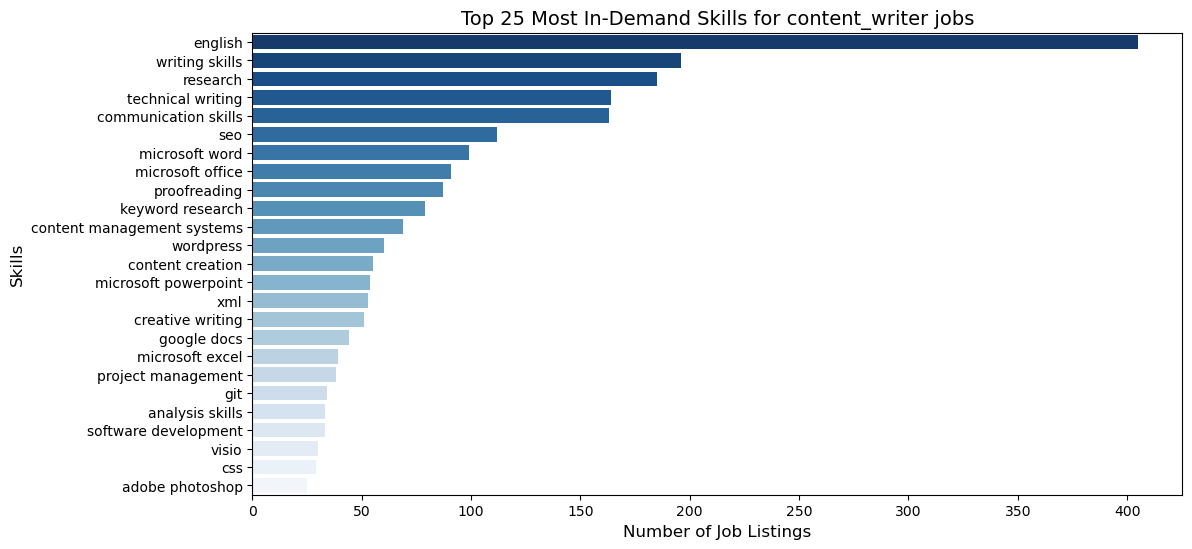

In [138]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [140]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                              company_name  salary_lpa
625                                 Vitech        48.0
412                          Ortu Software        48.0
687  iRageCapital Advisory Private Limited        48.0
152                      Corent Technology        48.0
225           Fluid.Live Solutions Pvt Ltd        48.0
504                          SentientGeeks        48.0
506                              ServerGuy        48.0
163                                  Cvent        48.0
563                         Tech Prescient        48.0
391                     Northcorp Software        48.0


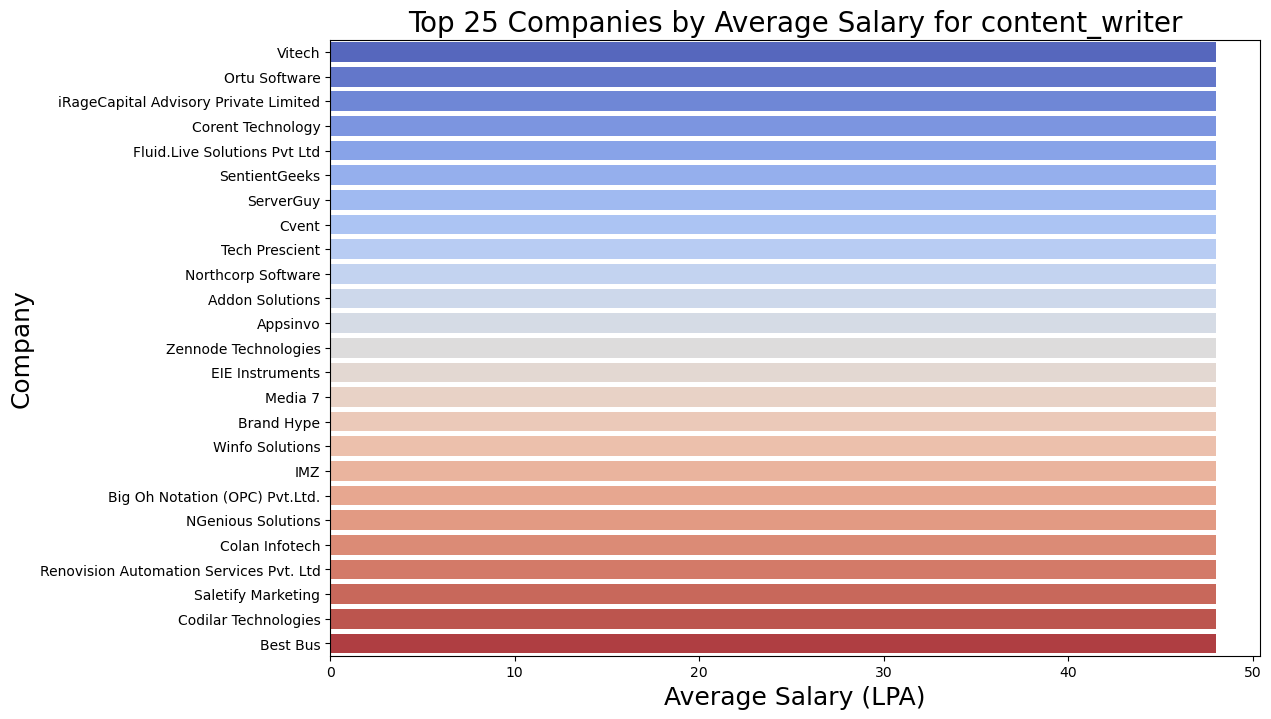

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

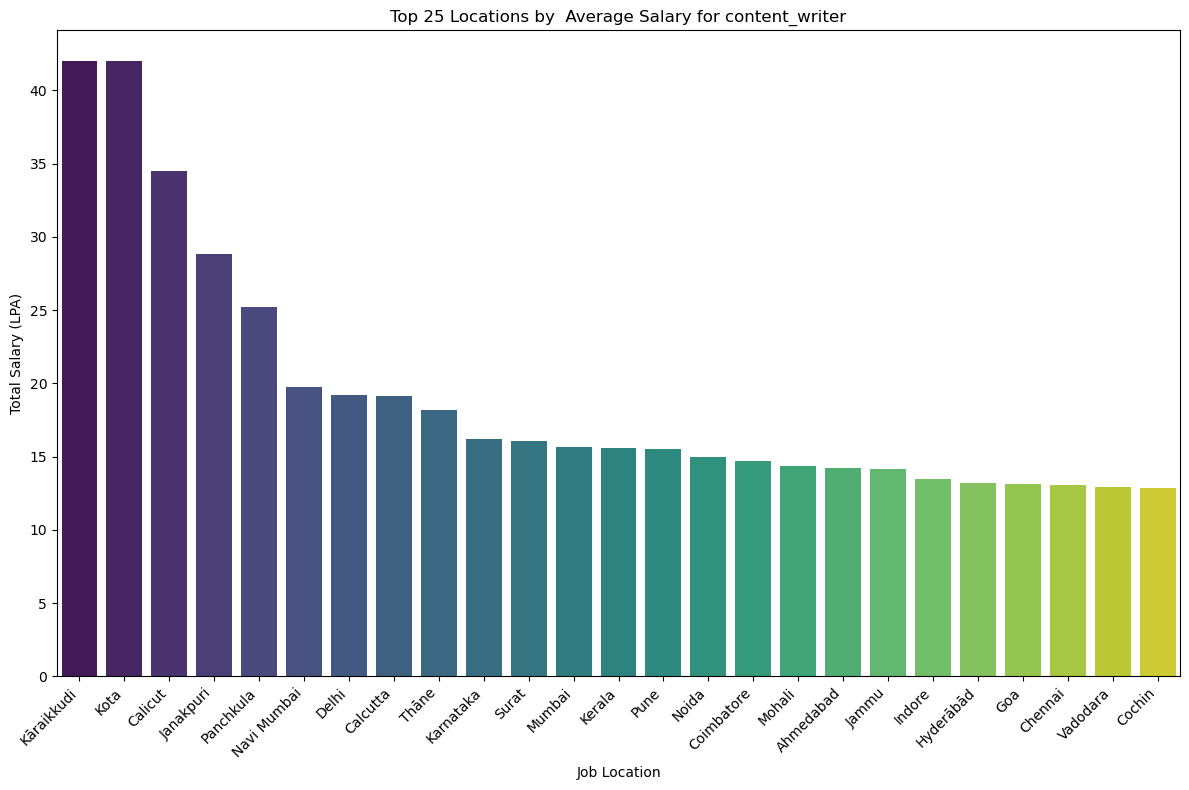

In [143]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

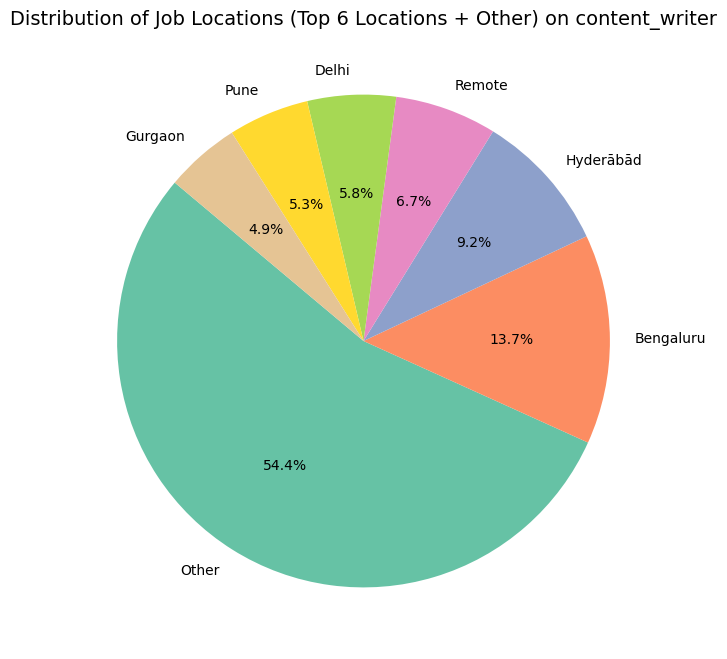

In [144]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

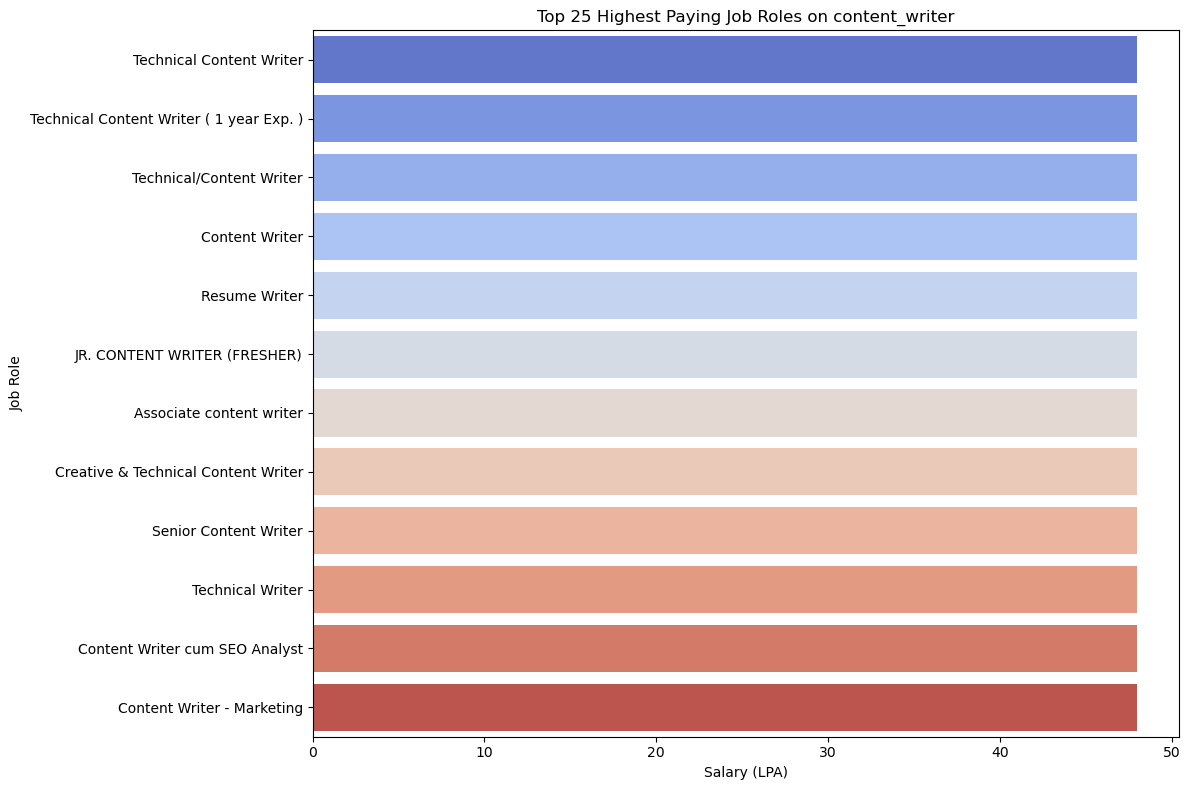

In [146]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [148]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_26836\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


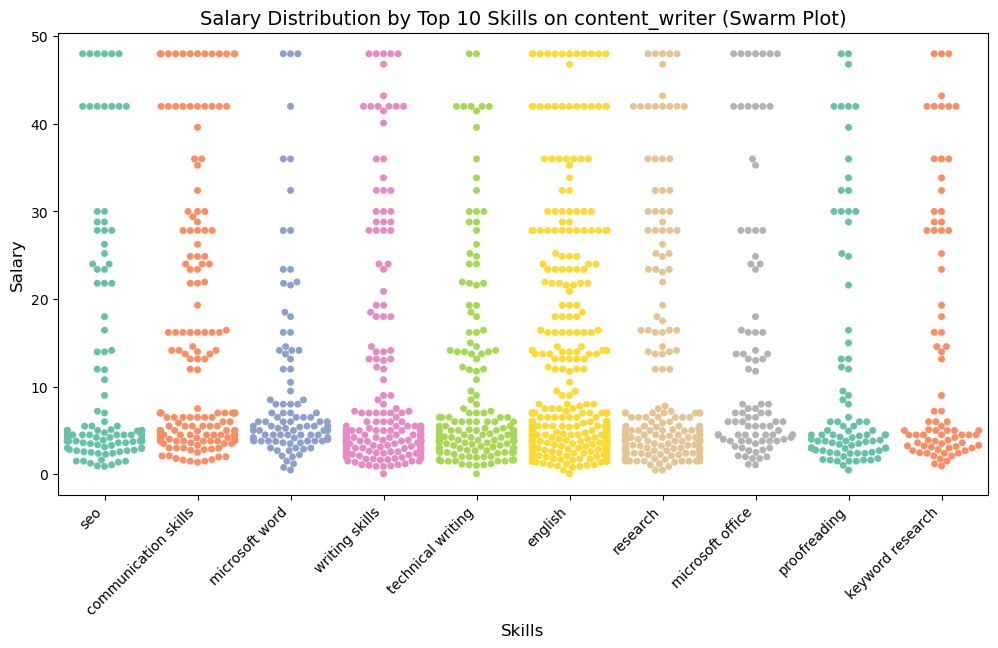

In [149]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

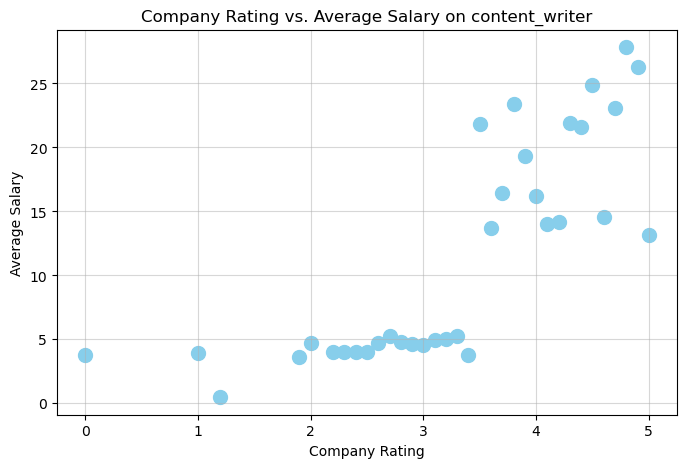

In [151]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [152]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.33600477776274496